<a href="https://colab.research.google.com/github/shahzebshafi/ECS-162-Project2/blob/main/ECS_170_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist            #Download the Fashion_MNIST Dataset from keras
import tensorflow as tf                             #Download other neccessary libraries for CNN
import numpy as np
import matplotlib.pyplot as plt



(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data() #Load Fashion_MNIST Dataset and split it into the training and testing sets



In [ ]:
train_x = train_x / 255.0             #Normalize the Data so the values are floats in [0, 1]
test_x = test_x / 255.0

class_names = ['T-shirt', 'Pants', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' ]

model = tf.keras.models.Sequential()  #Create Sequential Model using Keras

model.add(                            #2D Convolutional Layer with 28 filters
    tf.keras.layers.Conv2D(
        filters = 28,
        kernel_size = (3,3),
        strides = (1,1),
        padding = 'valid',
        activation = 'relu',
        input_shape = (28, 28, 1)
    )
)

model.add(                            #2x2 Max Pooling
    tf.keras.layers.MaxPooling2D(
        pool_size = (2,2),
        strides = (2,2)
    )
)

model.add(                            #2D Convolutional Layer with 56 filters
     tf.keras.layers.Conv2D(
        filters = 56,
        kernel_size = (3,3),
        strides = (1,1),
        padding = 'valid',
        activation = 'relu',
    )
)

model.add(                            #Flatten the 2D output into a one dimensiional vector
    tf.keras.layers.Flatten()
    )

model.add(                            #Fully-Connected layer wtih 56 nodes
    tf.keras.layers.Dense(
        units = 56,
        activation = 'relu'
    )
)

model.add(                            #Fully connected layer with 10 nodes and softmax activation
    tf.keras.layers.Dense(
        units = 10,
        activation = 'softmax'
    )
)

model.compile(                       #Put model together using Adam optimizer and sparse categorical cross-entropy loss
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
    )

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 56)        14168     
                                                                 
 flatten_2 (Flatten)         (None, 6776)              0         
                                                                 
 dense_4 (Dense)             (None, 56)                379512    
                                                                 
 dense_5 (Dense)             (None, 10)                570       
                                                      

There are 394,540 trainable parameters

In [ ]:
history = model.fit(            #Training the Model
    train_x, train_y,           #Training Data
    batch_size = 32,            #32 observations per gradient update
    epochs = 10,                #10 total passes of the training dataset (epoch)
    validation_split = 0.2,     #20% of training set is used for validation, which is 12,000 samples
    verbose = 1

)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4345 - accuracy: 0.8437 - val_loss: 0.3149 - val_accuracy: 0.8882
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2816 - accuracy: 0.8970 - val_loss: 0.2753 - val_accuracy: 0.9008
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2343 - accuracy: 0.9148 - val_loss: 0.2483 - val_accuracy: 0.9087
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2000 - accuracy: 0.9272 - val_loss: 0.2354 - val_accuracy: 0.9158
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1720 - accuracy: 0.9363 - val_loss: 0.2412 - val_accuracy: 0.9157
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1470 - accuracy: 0.9457 - val_loss: 0.2332 - val_accuracy: 0.9190
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1255 - accuracy: 0.9539 - val_loss: 0.2481 - val_accuracy:

Above is the training and validation accuracy at the end of each epoch. It seems the accuracy of the training data goes up from around 84% to 97%, but the accuracy of the model on the validation set goes up from 88% to 91%. The accuracy is high, but the accuarcy on the validation set rises slower through each epoch compared to the accuracy of the training set.

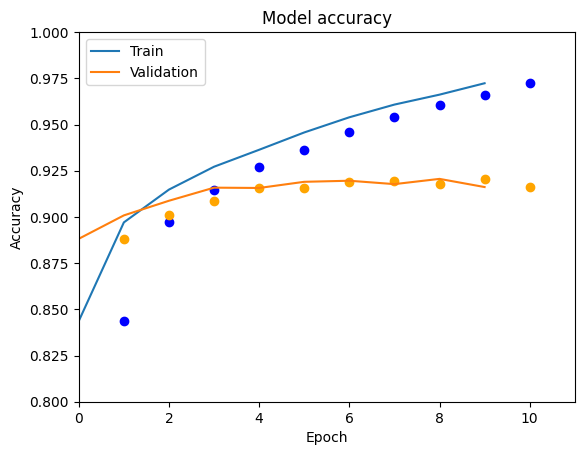

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

epochpts = range(1, len(history.history['accuracy']) + 1)
plt.scatter(epochpts, history.history['accuracy'], color='blue')
plt.scatter(epochpts, history.history['val_accuracy'], color='orange')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.axis([0, 11, 0.8, 1])
plt.show()

This shows the plot of the accuracy for both the training set and the validation set. There's a data point for each epoch at where it was located, and the lines shows the best fit through those points. It can be seen the accuracy of the training set rises quickly through each epoch. The validation set also rises, but at a much slower rate to the point where it almost looks stagnant. The accuracy of both sets is in the 90th percentile.

In [ ]:
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3097 - accuracy: 0.9146 - 877ms/epoch - 3ms/step

Test accuracy: 0.9146000146865845


The total accuracy is 91% which is decent. For this assignment the goal was to get it above 85%, but I saw some models online that had 98% accuracy. So it's not as good as that, but it's close.

313/313 [==============================] - 1s 2ms/step


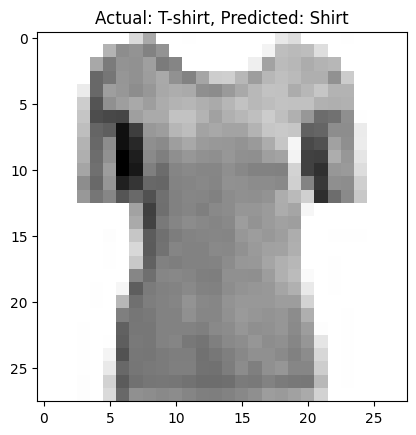

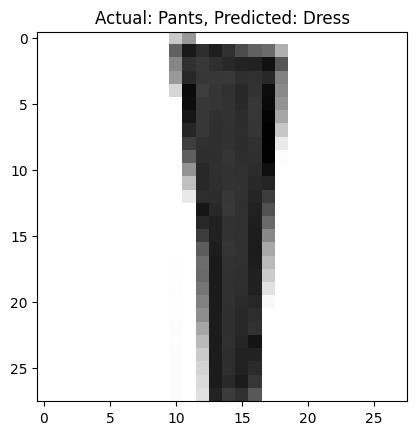

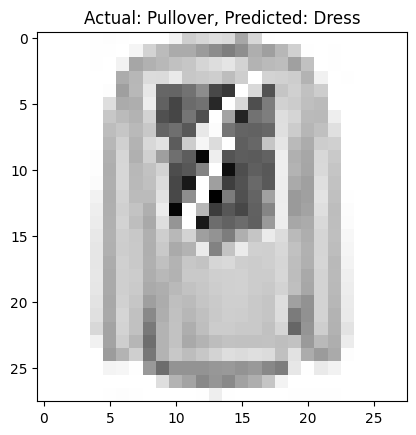

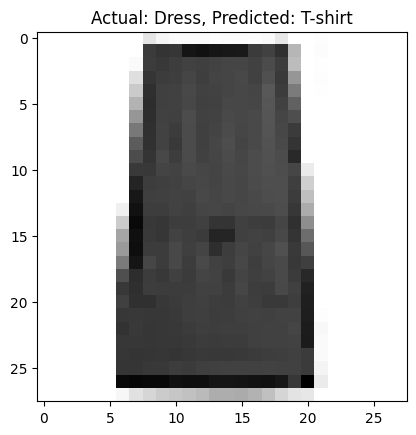

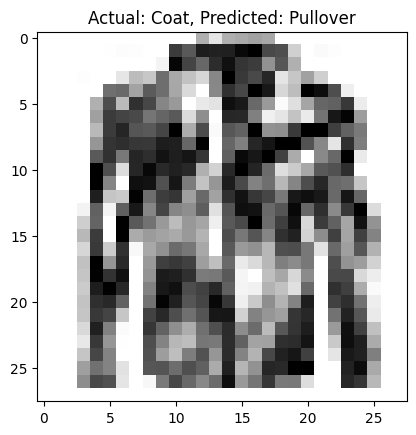

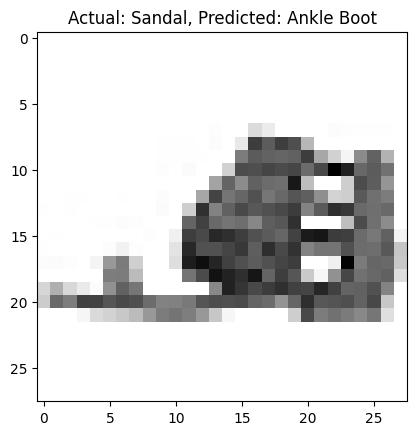

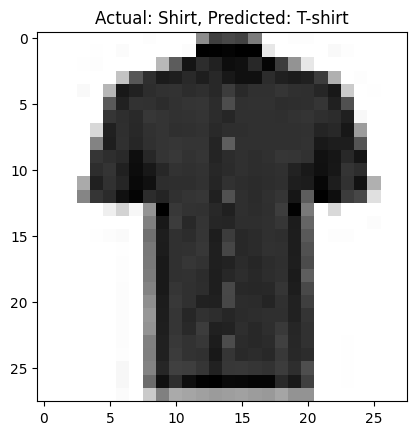

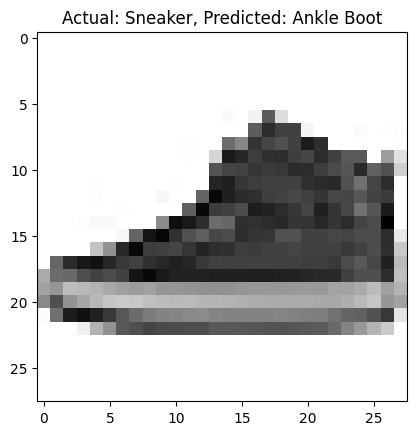

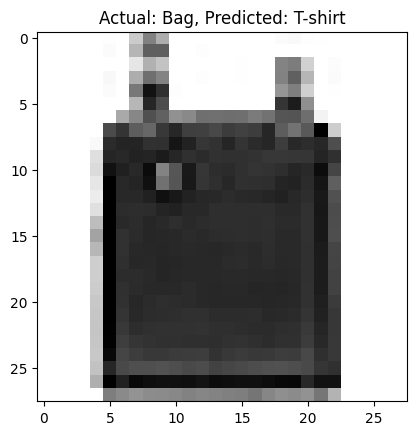

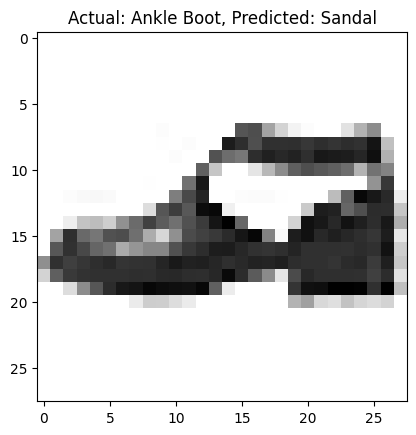

In [ ]:
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)
misclassified = np.where(predicted_classes != test_y)[0]

# Show an example for each class
for i in range(10):
    misclassified_i = [j for j in misclassified if test_y[j] == i]
    plt.figure()
    plt.imshow(test_x[misclassified_i[0]], cmap=plt.cm.binary)
    plt.title(f"Actual: {class_names[i]}, Predicted: {class_names[predicted_classes[misclassified_i[0]]]}")

Above shows an example for each class where the model misclassifies

I believe the model performed well because it was above 90% accuracy for both the training set and the validation set by the last epoch. The only issue is what I mentioned earlier, that the growth of the accuracy on the validation set is much slower than that of the training set. It still grows which means that the network is able to generalize to new data but just at a bit of a slow rate. This could be due to some type of overfitting that may have occured. So if I were to improve this model, I would maybe add more layers or modify the existing layers to see if that would improve the accuracy to possibly above 95%.